# Credit Card Fraud Detection With Logistic Regression
![Credit-Card-Fraud.jpg](attachment:./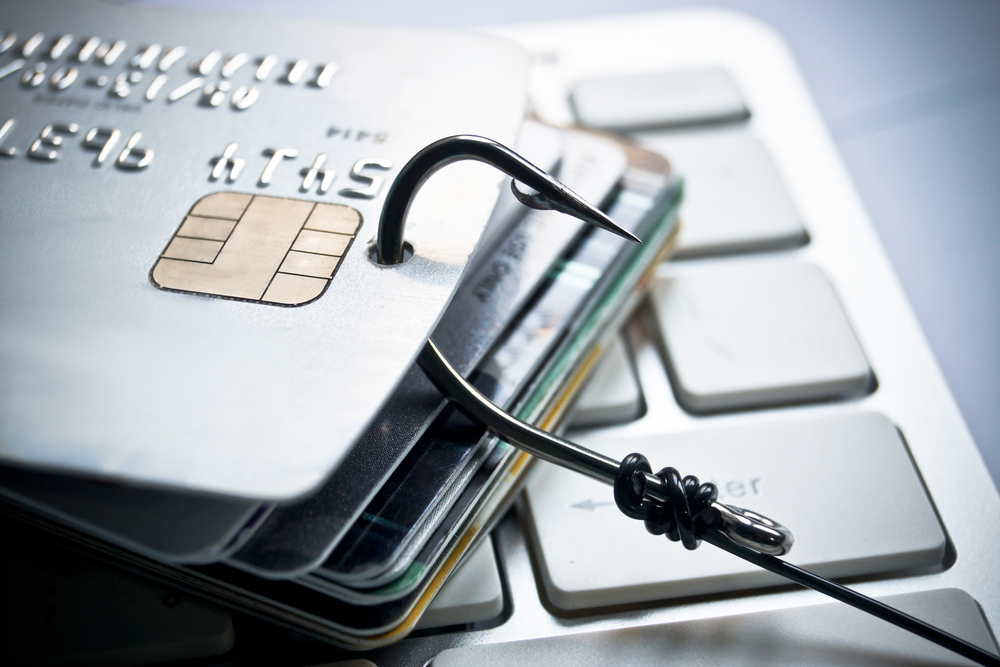)




Image source: https://www.dignited.com/wp-content/uploads/2018/10/Credit-Card-Fraud-768x512.jpg

Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Introduction


<p align = "justify">Main target of this project is to create machine learning model which will be able to classify financial transaction as fraud or non fraud. Data will be cleaned, preprocessed and then balanced. All of these processes will improve model perfomance and classification accuracy. Dataset provided in link above includes about 284 thousand cases with only 492 fraud transaction. Every row of dataset contains information about time and amount of transactions. There are 28 more columns which are components produced by PCA preprocessing algorithm. <p>


## Libriaries and modules:


*   Pandas
*   Numpy
*   Seaborn
*   Matplotlib
*   Scikitlearn


## List of Contents:


1. Importring modules and loading dataset
2. Basic insights
3. Visualization before balancing
4. Balancing and sampling
5. Visualization of balanced data
6. Preprocessing and Feature Selection
7. Model initzialization and training
8. Model output and evaulation
9. Summary


# 1. Importring modules and loading dataset


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%matplotlib inline

In [3]:
fraud_dataset = pd.read_csv('/data/notebook_files/creditcard.csv')

# 2. Basic inisghts

### Sample

In [4]:
fraud_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Statistics

In [5]:
fraud_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Columns

In [6]:
pd.DataFrame(fraud_dataset.columns)

,0
0,Time
1,V1
2,V2
3,V3
4,V4
5,V5
6,V6
7,V7
8,V8
9,V9


In [7]:
print("Target class ratio:")
pd.DataFrame({'Amount':fraud_dataset['Class'].value_counts(),
              'Ratio': [round(fraud_dataset['Class'].value_counts()[0]/fraud_dataset['Class'].count()*100, 2)
                  , round(fraud_dataset['Class'].value_counts()[1]/fraud_dataset['Class'].count()*100, 2)]} )

Target class ratio:


,Amount,Ratio
0,284315,99.83
1,492,0.17


In [8]:
pd.DataFrame({"Ammount of Nan": fraud_dataset.isna().sum()})

,Ammount of Nan
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# 3. Visualization before balancing

In [9]:
sns.set()

### Variables distribution

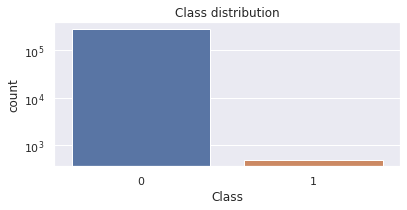

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes((.1, .4, .8, .5))
ax = sns.countplot(x=fraud_dataset['Class'])
ax.set_title("Class distribution")
ax.set_yscale("log")
plt.show()

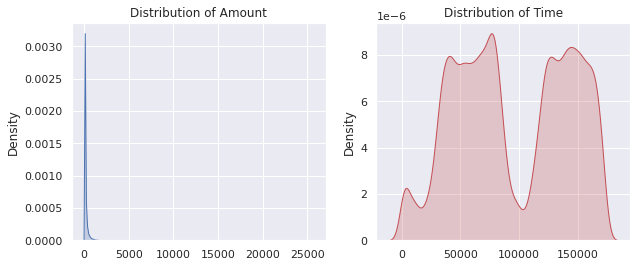

In [11]:
x1 = fraud_dataset['Amount'].values
x2 = fraud_dataset['Time'].values
fig , axes = plt.subplots(1, 2,figsize=(10, 4))

sns.kdeplot(ax=axes[0], shade=True, x=x1, color='b')
axes[0].set_title("Distribution of Amount")

sns.kdeplot(ax=axes[1], shade=True, x=x2, color='r')
axes[1].set_title("Distribution of Time")

plt.show()

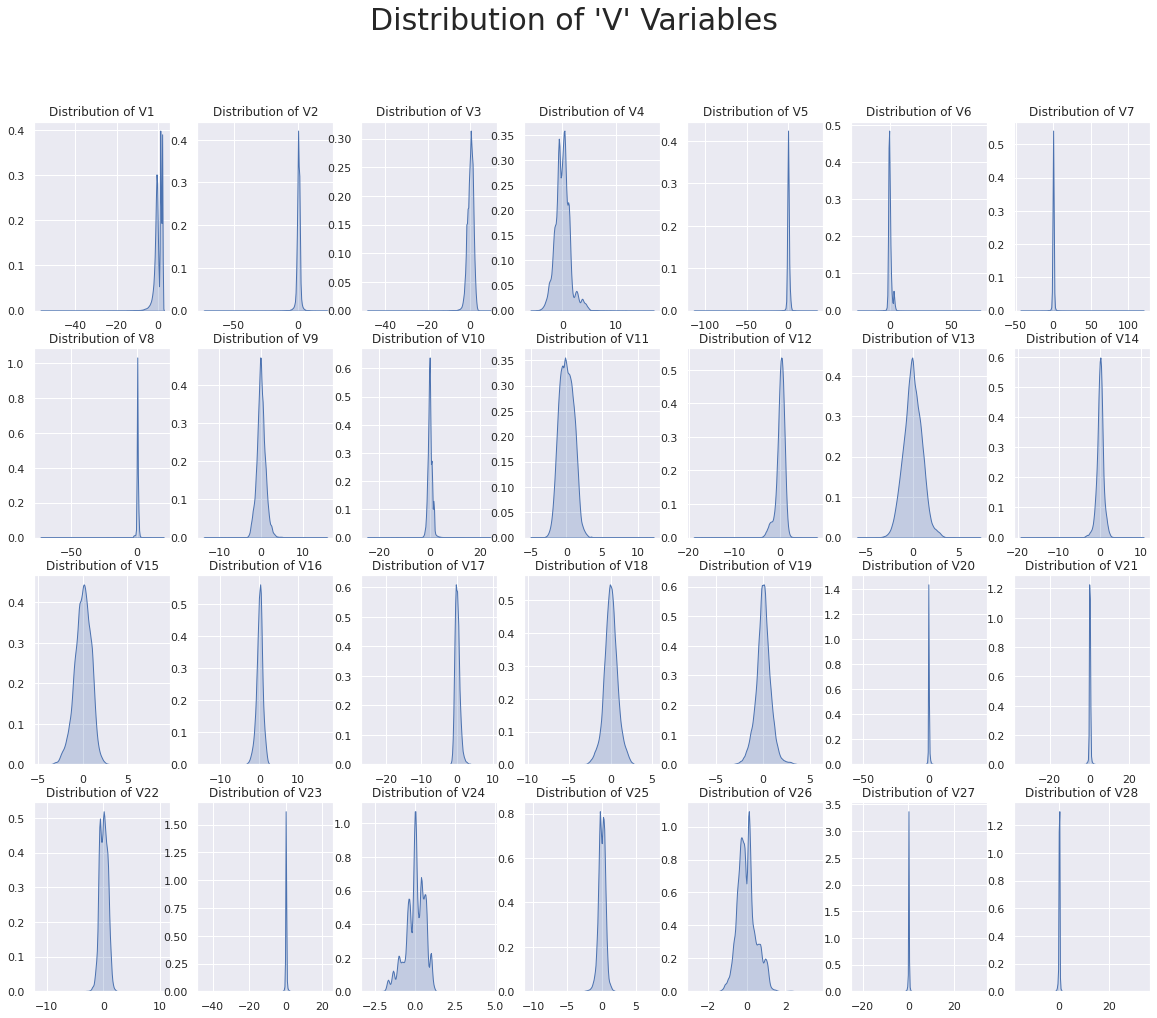

In [12]:
v_vars = pd.DataFrame(fraud_dataset.drop(['Amount', 'Time', 'Class'], axis=1))

fig, axes = plt.subplots(4, 7, figsize=(20, 16))
fig.suptitle("Distribution of 'V' Variables", fontsize=30)

k = 1

for i in range(4):
    for y in range(7):
        v = v_vars[f"V{k}"]
        sns.kdeplot(ax=axes[i][y], shade=True, x=v, color='b')
        axes[i][y].set_title(f"Distribution of V{k}")
        axes[i][y].set_ylabel("")
        axes[i][y].set_xlabel("")
        k += 1

plt.show()

### Correlations

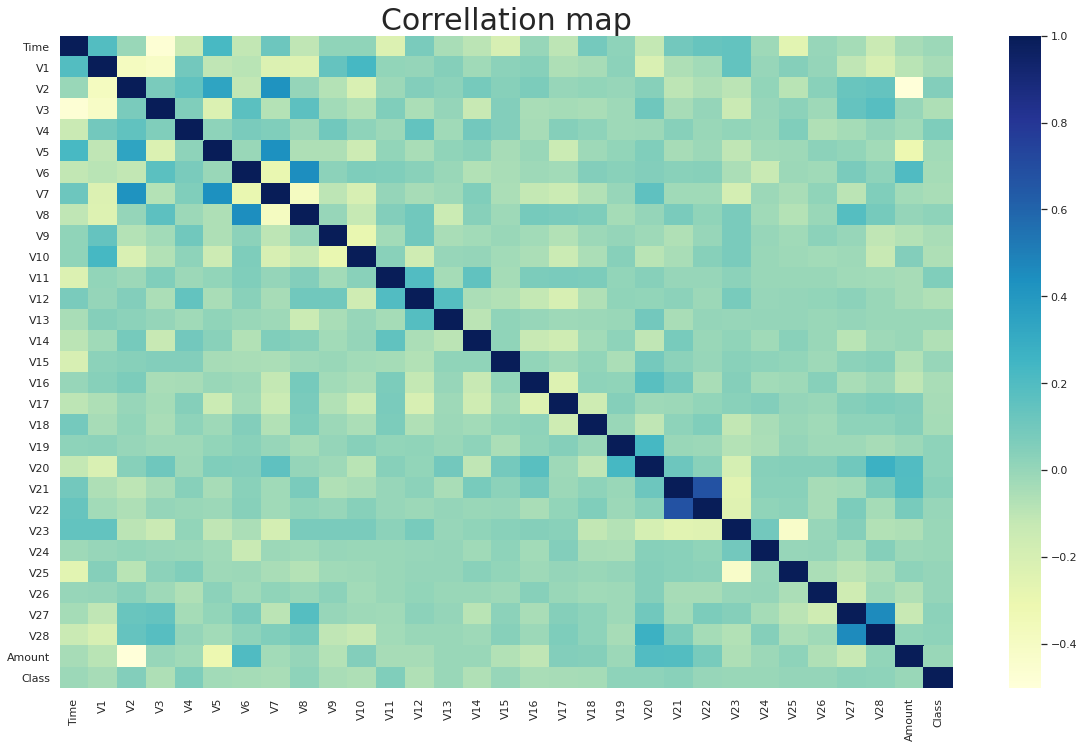

In [13]:
fig = plt.figure(figsize=(20, 12))
ax = sns.heatmap(fraud_dataset.corr(method='spearman'), cmap="YlGnBu")
ax.set_title("Correllation map", fontsize=30)
plt.show()

# 4. Balancing and sampling

In [14]:
fraud = fraud_dataset[fraud_dataset["Class"]==1]
non_fraud = fraud_dataset[fraud_dataset['Class']==0]

In [15]:
print(f"Fraud transactions: {len(fraud)}\nNon fraud transactions: {len(non_fraud)}")

Fraud transactions: 492
Non fraud transactions: 284315


## Oversampling and undersampling - which way is best to improve balance of dataset?
<p align="justify">Inballance between fraud and non fraud cases is way too big. There two main techniques to deal with this type of datasets - oversampling and undersampling. Main con of undersampling is that we are losing information. Oversampling is not ideal at - we are randomly copying same cases so it may cause poor performance of machine learning model. In this case the ratio between class 0 and class 1 is 99.83 to 0.17. It means that we can't use oversampling with original size of dataset.In first step we will drop random records of non fraud cases. 1000 records will be saved and then we will oversample fraud subset. That gives us dataset with 2000 records and perfect balance between target classes. <p>

In [16]:
print("Oversampling and undersampling")
final_size = 1000
fraud_oversample = fraud.sample(final_size, replace=True)
non_fraud_undersample = non_fraud.sample(final_size)
print(f"Fraud subset size: {fraud_oversample.shape}\nNon fraud subset size: {non_fraud_undersample.shape}")

Oversampling and undersampling
Fraud subset size: (1000, 31)
Non fraud subset size: (1000, 31)


In [17]:
print("Concatenating subsets")
fraud_dataset_balanced = pd.concat([fraud_oversample, non_fraud_undersample], sort=True)
pd.DataFrame({'Amount':fraud_dataset_balanced['Class'].value_counts(),
              'Ratio': [round(fraud_dataset_balanced['Class'].value_counts()[0]/fraud_dataset_balanced['Class'].count()*100, 2)
                  , round(fraud_dataset_balanced['Class'].value_counts()[1]/fraud_dataset_balanced['Class'].count()*100, 2)]} )

Concatenating subsets


,Amount,Ratio
0,1000,50.0
1,1000,50.0


# 5. Visualization of balanced data

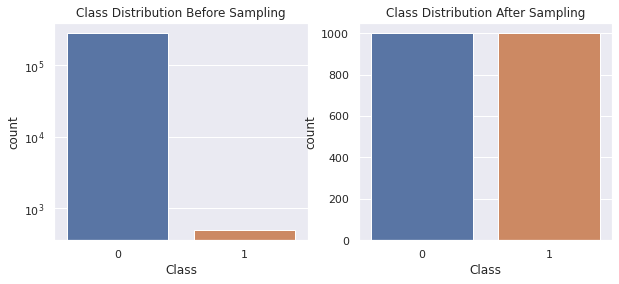

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(ax=axes[0], x=fraud_dataset['Class'])
axes[0].set_title("Class Distribution Before Sampling")
axes[0].set_yscale("log")

sns.countplot(ax=axes[1], x=fraud_dataset_balanced['Class'])
axes[1].set_title("Class Distribution After Sampling")
plt.show()

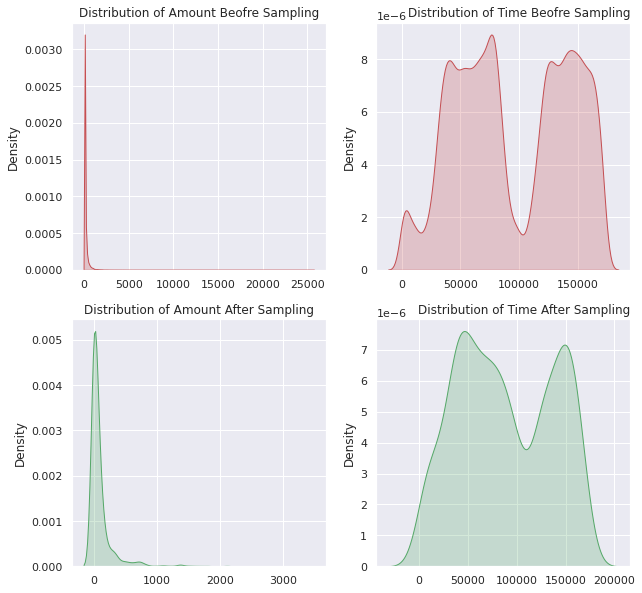

In [19]:
x1 = fraud_dataset['Amount'].values
x2 = fraud_dataset['Time'].values

x3 = fraud_dataset_balanced['Amount'].values
x4 = fraud_dataset_balanced['Time'].values


fig, axes = plt.subplots(2, 2, figsize=(10 ,10))


sns.kdeplot(ax=axes[0][0], shade=True, x=x1, color='r')
axes[0][0].set_title("Distribution of Amount Beofre Sampling")

sns.kdeplot(ax=axes[0][1], shade=True, x=x2, color='r')
axes[0][1].set_title("Distribution of Time Beofre Sampling", loc="right")

sns.kdeplot(ax=axes[1][0], shade=True, x=x3, color='g')
axes[1][0].set_title("Distribution of Amount After Sampling")

sns.kdeplot(ax=axes[1][1], shade=True, x=x4, color='g')
axes[1][1].set_title("Distribution of Time After Sampling", loc="right")

plt.show()

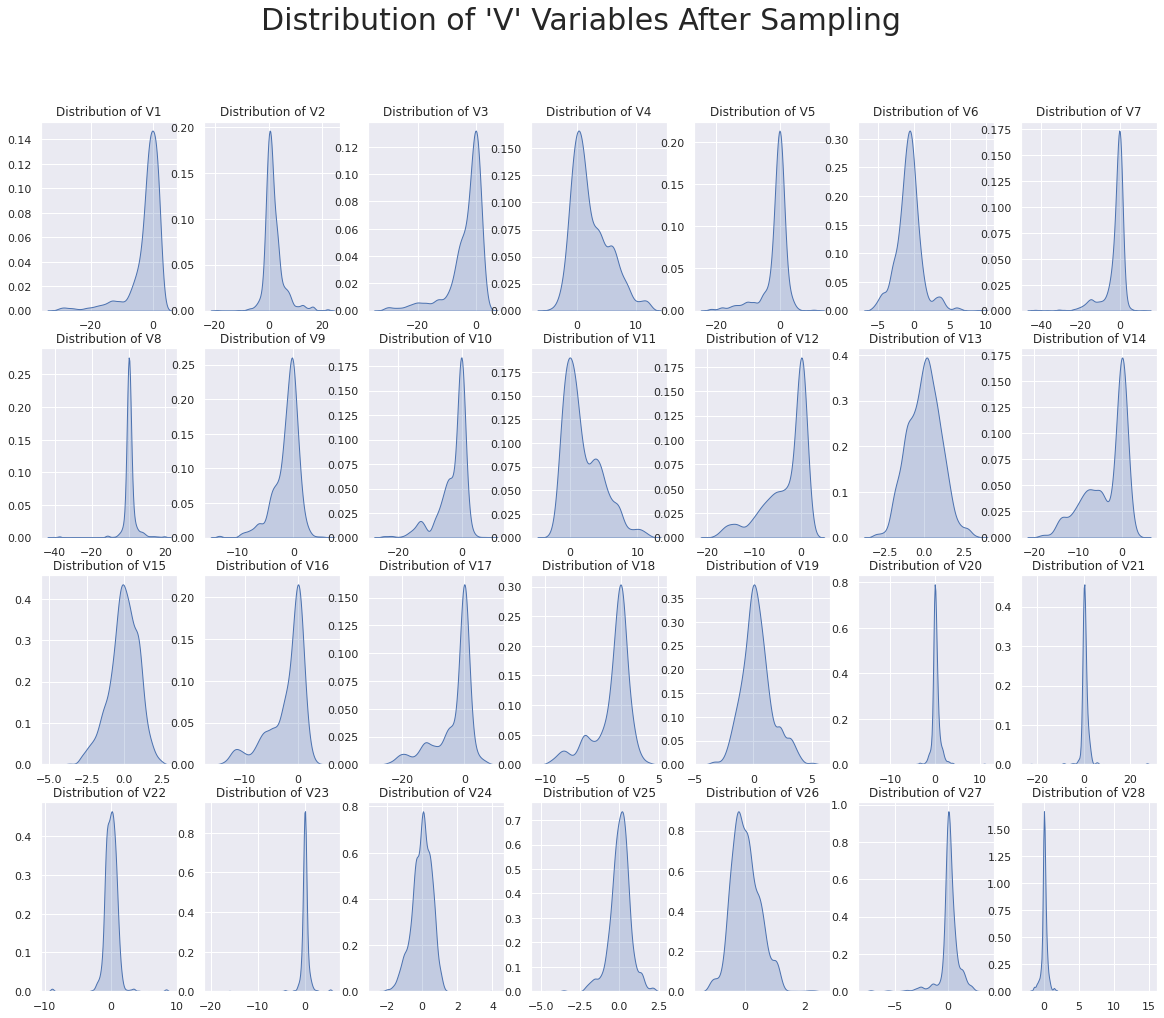

In [20]:
v_vars = pd.DataFrame(fraud_dataset_balanced.drop(['Amount', 'Time', 'Class'], axis=1))

fig, axes = plt.subplots(4, 7, figsize=(20, 16))
fig.suptitle("Distribution of 'V' Variables After Sampling", fontsize=30)

k = 1

for i in range(4):
    for y in range(7):
        v = v_vars[f"V{k}"]
        sns.kdeplot(ax=axes[i][y], shade=True, x=v, color='b')
        axes[i][y].set_title(f"Distribution of V{k}")
        axes[i][y].set_ylabel("")
        axes[i][y].set_xlabel("")
        k += 1

plt.show()

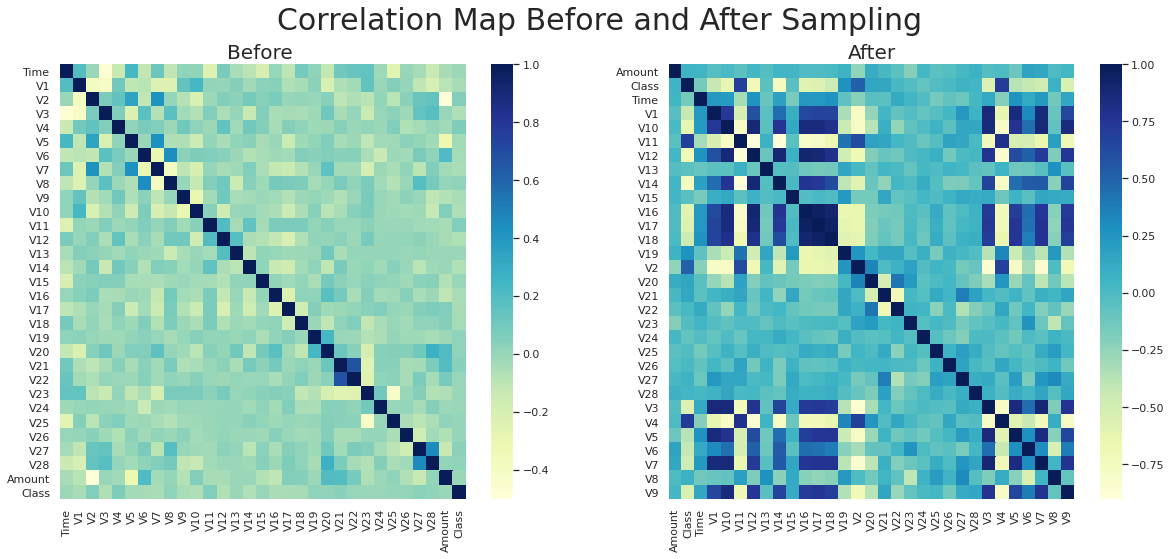

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Correlation Map Before and After Sampling", fontsize=30)

sns.heatmap(ax=axes[0], data=fraud_dataset.corr(method='spearman'), cmap="YlGnBu")
axes[0].set_title("Before ", fontsize=20)

sns.heatmap(ax=axes[1], data=fraud_dataset_balanced.corr(), cmap="YlGnBu")
axes[1].set_title("After", fontsize=20)

plt.show()

<p align="justify"> Charts above sohws that sampling process hasn't significantly changed distributions of idependent variables. What realy has been changed is relation between particular variables. Reliationships within the data became more visible and it would be easier to select most significant variables. For sure that will improve model performance. 
<p>

# 6. Preprocessing and Feature Selection

<p align="justify"> This dataset provides 30 features, so it would be necessary to pick most important ones. Skipping this proces can make model outcome less significant or overfitting can occur. 

### Modules import

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

### Data split

In [23]:
X = fraud_dataset_balanced.drop('Class', axis=1).values.tolist()
y = fraud_dataset_balanced['Class'].values.tolist()

### Feature selection

In [24]:
feature_selection = SelectKBest(score_func=f_classif, k='all')
feature_selection.fit(X, y)

X = feature_selection.transform(X)

In [25]:
selection_results = pd.DataFrame({"Variable": fraud_dataset_balanced.drop("Class", axis=1).columns,
                                  "Score": feature_selection.scores_,
                                  "P-Value": feature_selection.pvalues_})
selection_results

,Variable,Score,P-Value
0,Amount,7.748011,5.427789e-03
1,Time,51.500939,1.004312e-12
2,V1,441.786297,8.956404e-89
3,V10,1275.787480,1.641875e-216
4,V11,1890.514799,3.227577e-291
5,V12,1881.724230,3.099648e-290
6,V13,5.705261,1.700648e-02
7,V14,2652.974513,0.000000e+00
8,V15,3.955805,4.684615e-02
9,V16,1062.583970,2.866122e-187


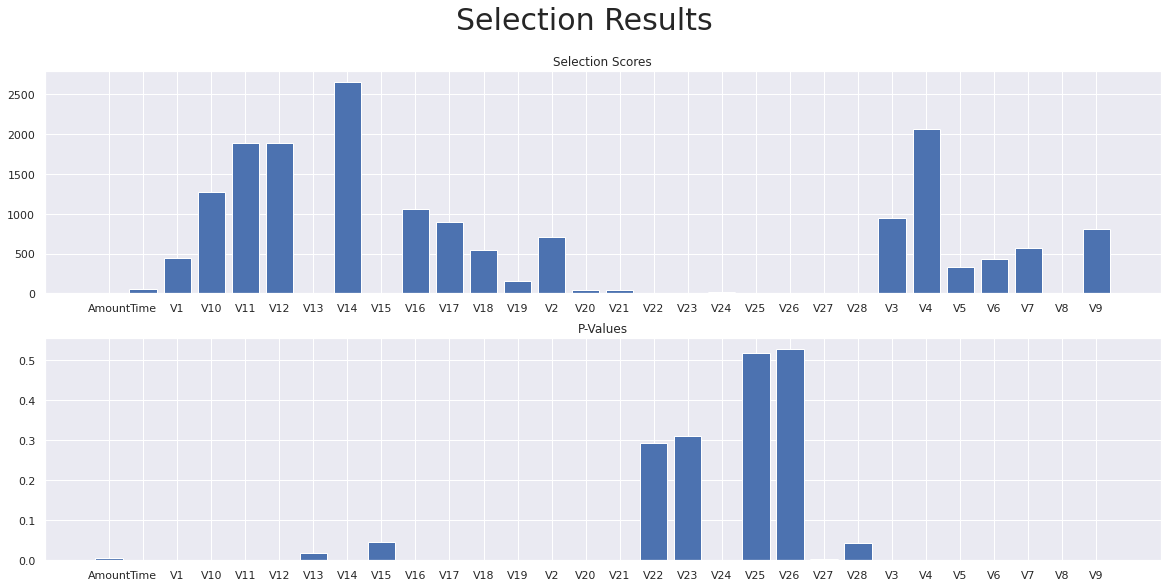

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(20, 9))
fig.suptitle("Selection Results", fontsize=30)

axes[0].bar(selection_results['Variable'].values, selection_results['Score'].values)
axes[0].set_title("Selection Scores")

axes[1].bar(selection_results['Variable'].values, selection_results['P-Value'].values)
axes[1].set_title("P-Values")
plt.show()

In [27]:
selection_results = selection_results[selection_results['P-Value']<0.005]
selected_columns = selection_results['Variable'].values.tolist()
X = fraud_dataset_balanced[selected_columns].values.tolist()

### Scaling and standarization

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 7. Model initialization and training

In [32]:
from sklearn.linear_model import LogisticRegression

### Model initialization

In [33]:
logistic = LogisticRegression()

In [34]:
logistic.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [35]:
predictions_logistic = logistic.predict(X_test)

# 8. Model output and evaulation

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, accuracy_score, average_precision_score, log_loss

### Confusion matrix

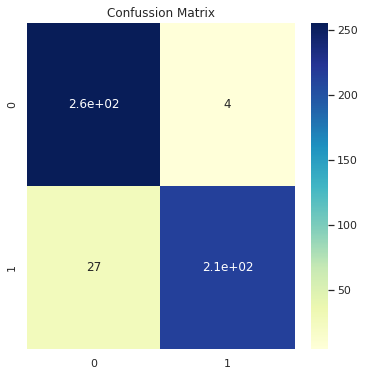

In [37]:
fig = plt.figure(figsize=(6, 6))

ax = sns.heatmap(confusion_matrix(y_test, predictions_logistic), annot=True, cmap="YlGnBu")
ax.set_title("Confussion Matrix")

plt.show()

### Other metrics

In [38]:
pd.DataFrame({"Metric":['Accuracy', 'Avg Precision', 'Log loss'],
            "Score":[accuracy_score(y_test, predictions_logistic),
            round(average_precision_score(y_test, predictions_logistic), 2),
            round(log_loss(y_test, predictions_logistic), 2)]})

,Metric,Score
0,Accuracy,0.938
1,Avg Precision,0.930
2,Log loss,2.140


In [39]:
print(classification_report(y_test, predictions_logistic))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       259
           1       0.98      0.89      0.93       241

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



### Coefficients

In [40]:
pd.DataFrame({"Intercept":logistic.intercept_})

,Intercept
0,4.131635


In [41]:
coefs = pd.DataFrame({"Variable": selected_columns, "Coefficient": logistic.coef_[0]})
coefs

,Variable,Coefficient
0,Time,-0.249978
1,V1,-0.402309
2,V10,-1.711094
3,V11,0.654645
4,V12,-2.230245
5,V14,-2.580255
6,V16,-1.089284
7,V17,-0.146837
8,V18,-0.164581
9,V19,-0.198866


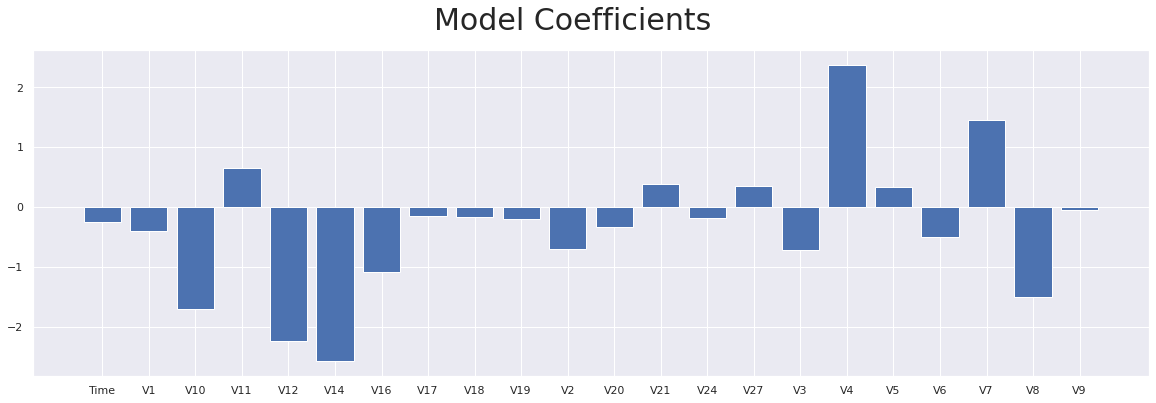

In [42]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle("Model Coefficients", fontsize=30)

ax = plt.bar(selection_results['Variable'].values, coefs["Coefficient"].values)

plt.show()

### ROC 

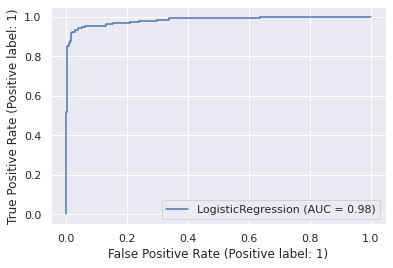

In [43]:
plot_roc_curve(logistic, X_test, y_test)
plt.show()

# 9. Summary

### Model's performance

<p align="justify"> Best model accuracy evolved to a level of 0.95%. Other metrics of model's perfomance are very promising too. ROC curve suggests optimal sensitivity-specificity trade-off, best threshold level around 0.8. Area under the curve ensure that model is able to distinguish fraud and non-fraud transactions perfectly. 
<p>

### Coefficients

In [67]:
coefs_and_odds = coefs
coefs_and_odds['Odds'] = np.exp(coefs_and_odds["Coefficient"])
coefs_and_odds.sort_values(by=["Coefficient"])

,Variable,Coefficient,Oddds,Odds
5,V14,-2.580255,0.075755,0.075755
4,V12,-2.230245,0.107502,0.107502
2,V10,-1.711094,0.180668,0.180668
20,V8,-1.507294,0.221508,0.221508
6,V16,-1.089284,0.336457,0.336457
15,V3,-0.712606,0.490365,0.490365
10,V2,-0.695711,0.498719,0.498719
18,V6,-0.506762,0.602443,0.602443
1,V1,-0.402309,0.668774,0.668774
11,V20,-0.330250,0.718744,0.718744


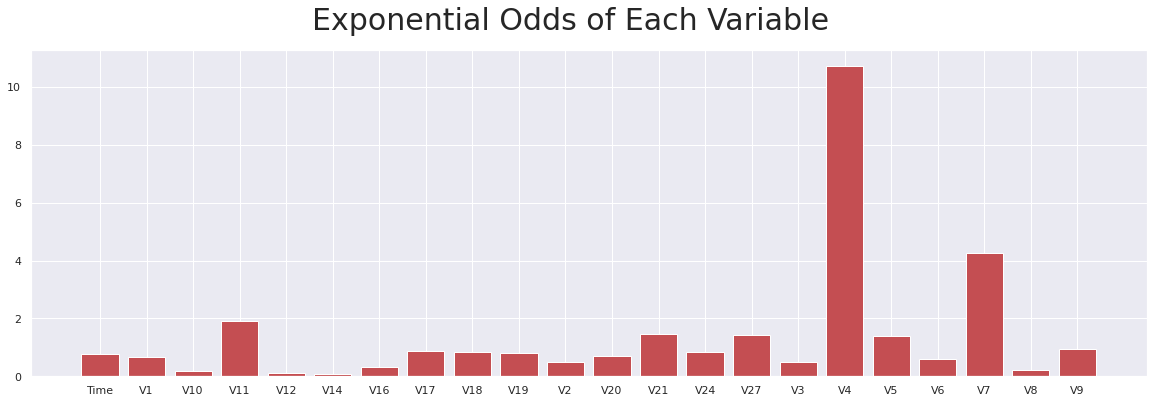

In [69]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle("Exponential Odds of Each Variable", fontsize=30)

ax = plt.bar(selection_results['Variable'].values, coefs_and_odds["Odds"].values, color="r")

plt.show()